In [203]:
import sys
sys.path.append("/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils")
from supervised import Supervised
from supervised import get_test_dataset
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# simple supervised evaluation

## Dataset 
The supervised dataset is a collection of tweets that have been extracted according to their hashtag, in the first exmaple we have bitcoin, ukrainian war, formula1, trump and climatechange. The tweets are in a folder and each topic should be in a jsonl file with the name of the topic. The jsonl data have been ectracted using twarc2.

Then two version of the same dataset have been created, one with the original tweets and one with the tweets without the hashtags.

In [204]:
df = get_test_dataset('./../../data/simple_supervised/')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


KeyboardInterrupt: 

## Evaluation

using the Supervised class, we can evaluate the dataset using different models, the accepted one are 
- NMF  
- Bertopic with openai embeddings 
- Bertopic with any sentence transformer embeddings model (https://huggingface.co/sentence-transformers)
    we are using: climatebert, tweetclassification, all-minil6v2
- Bertopic with USE
- 


In [ ]:
gsdmm = Supervised(df, 'GSDMM')
climatebert = Supervised(df, 'climatebert/distilroberta-base-climate-f')
tweetclass = Supervised(df, 'louisbetsch/tweetclassification-bf-model')
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')
use = Supervised(df, 'USE')




evaluate GSDMM
In stage 0: transferred 727 clusters with 5 clusters populated
In stage 1: transferred 335 clusters with 5 clusters populated
In stage 2: transferred 250 clusters with 5 clusters populated
In stage 3: transferred 144 clusters with 5 clusters populated
In stage 4: transferred 70 clusters with 5 clusters populated
In stage 5: transferred 58 clusters with 5 clusters populated
In stage 6: transferred 43 clusters with 5 clusters populated
In stage 7: transferred 47 clusters with 5 clusters populated
In stage 8: transferred 43 clusters with 5 clusters populated
In stage 9: transferred 37 clusters with 5 clusters populated
In stage 10: transferred 48 clusters with 5 clusters populated
In stage 11: transferred 37 clusters with 5 clusters populated
In stage 12: transferred 40 clusters with 5 clusters populated
In stage 13: transferred 42 clusters with 5 clusters populated
In stage 14: transferred 43 clusters with 5 clusters populated
In stage 15: transferred 35 clusters with 5 cl

No sentence-transformers model found with name /Users/alessiogandelli/.cache/torch/sentence_transformers/climatebert_distilroberta-base-climate-f. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/alessiogandelli/.cache/torch/sentence_transformers/climatebert_distilroberta-base-climate-f were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized fr

topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate louisbetsch/tweetclassification-bf-model
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2
evaluate openai
evaluate USE


2023-03-27 14:09:56.843465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Use tf.identity instead.


Instructions for updating:
Use tf.identity instead.


## Results 
first we can see the comparison between bertopic and traditional modes, then we will see the comparison between bertopic with different embeddings models.

before lookng at the accuracy it is important to note the min_topic_share metric, which define , for each inferred topic, the percentage of documents that are assigned to the same class. A value of 0.9 in the topic 1 means that 90% of the documents of a topic have been assigned to topic 1. when this value is low, it means that the topic is not well defined. Especially is the difference between the first two topics is low 

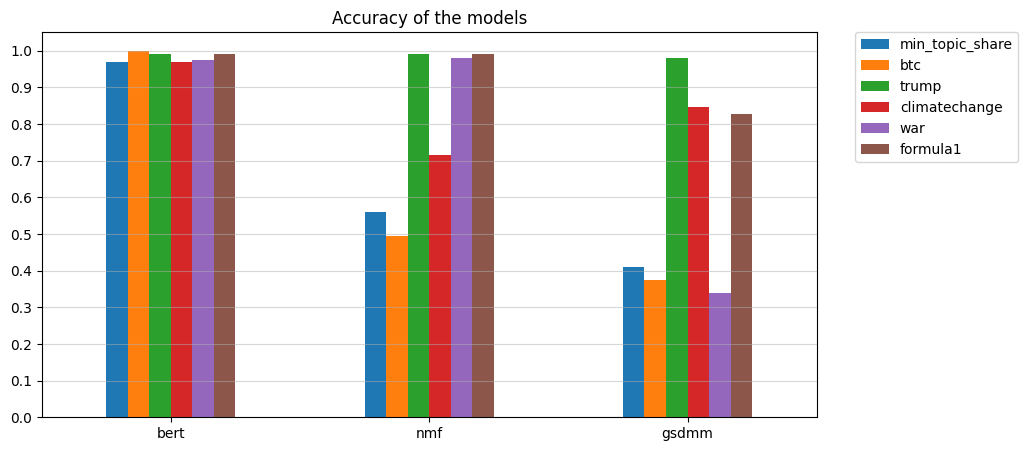

In [ ]:

def compare_models(models):
    # barplot grouped by column

    pd.DataFrame(models).T.plot.bar(rot=0, figsize=(10,5))
    #add title
    plt.title('Accuracy of the models')
    #add grid every 0.1
    plt.grid(axis='y', alpha=0.5)
    #add yticks every 0.1
    plt.yticks(np.arange(0, 1.1, 0.1))
    # legend outside 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


models = {'bert': bert.accuracy, 'nmf': nmf.accuracy, 'gsdmm': gsdmm.accuracy}
compare_models(models)

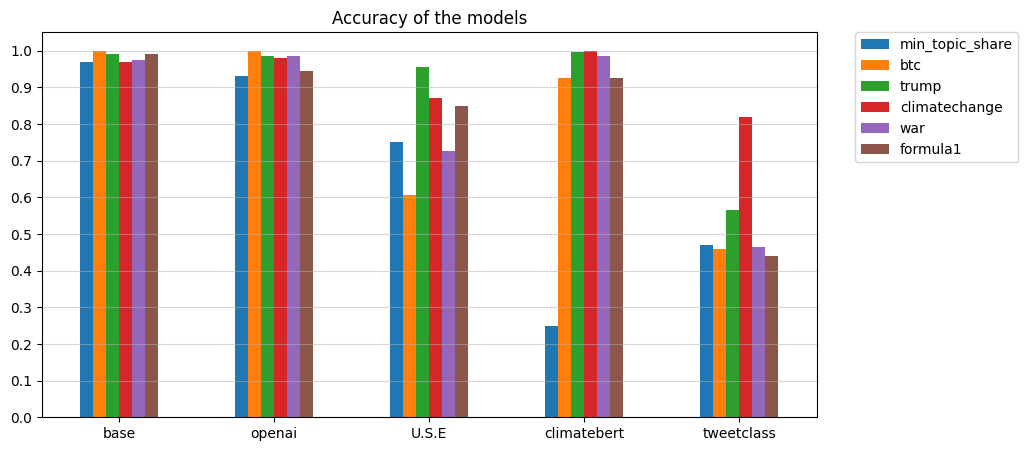

In [ ]:
bert_models = {  'base': bert.accuracy, 
                'openai': openai_eval.accuracy, 
                'U.S.E' : use.accuracy,
                'climatebert': climatebert.accuracy,
                'tweetclass': tweetclass.accuracy}

compare_models(bert_models)


<AxesSubplot: xlabel='my_topics', ylabel='topic'>

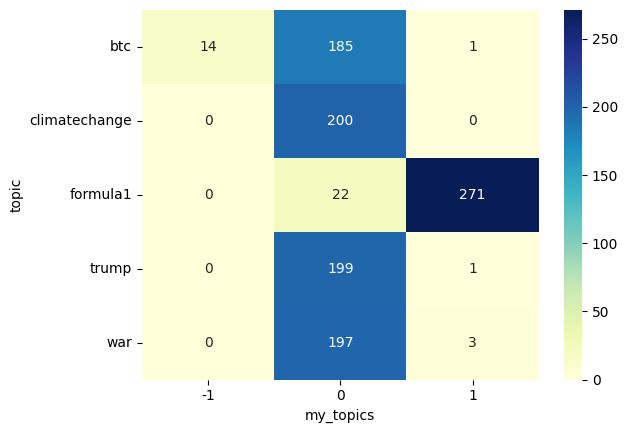

In [ ]:
climatebert.visualize_heatmap()






<AxesSubplot: xlabel='my_topics', ylabel='topic'>

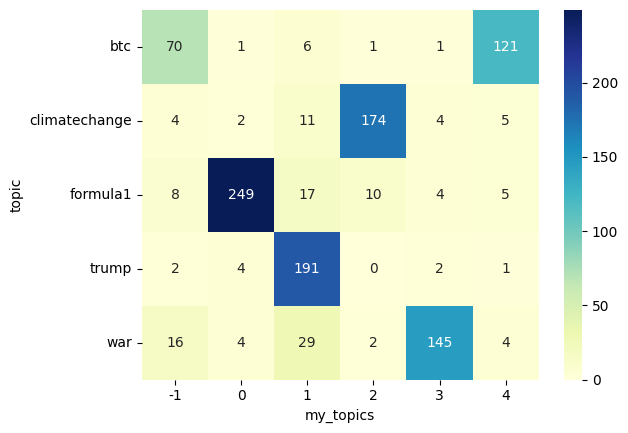

In [ ]:
use.visualize_heatmap()

## Evaluation without hashags 
that was an easy task since all the documents in a topic had the same hashtag, now er try to remove all the hashtags to see how it will affect the results  

In [ ]:
#%%
#bert = Supervised(df, 'all-MiniLM-L6-v2')
#openai_eval = Supervised(df, 'openai')

bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')
use = Supervised(df_no_hash, "USE" )



evaluate all-MiniLM-L6-v2
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate USE
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


## Results 
For each model here we present two different results: the accuracy and the accuracy without outliers. In fact bertopic do not require each document be in a class, later we will explore if the outliers are really outliers or not.

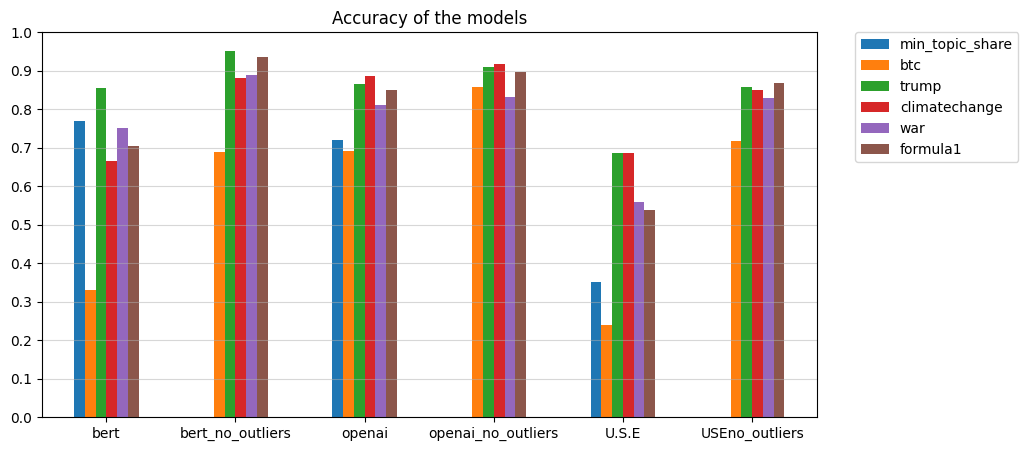

In [ ]:
import pandas as pd

nohash_models = {'bert': bert_no_hash.accuracy, 
                'bert_no_outliers': bert_no_hash.accuracy_no_outliers, 

                'openai': openai_no_hash.accuracy, 
                'openai_no_outliers': openai_no_hash.accuracy_no_outliers,

                'U.S.E' : use.accuracy,
                'USEno_outliers' : use.accuracy_no_outliers }

compare_models(nohash_models)




<AxesSubplot: xlabel='my_topics', ylabel='topic'>

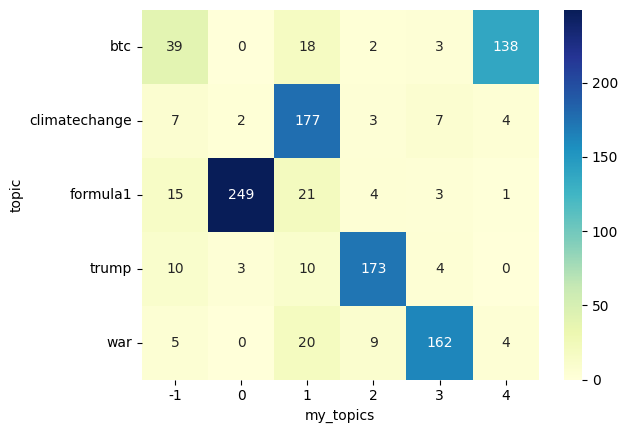

In [ ]:
openai_no_hash.visualize_heatmap()

In [ ]:
bert_no_hash.visualize_documents()

In [ ]:
openai_no_hash.visualize_documents()

## outliers


In [ ]:
openai_no_hash.df[openai_no_hash.df['my_topics'] == -1]['text'].value_counts()

@APompliano Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.                                                                                                 12
Hello dear,Are you looking for Expe Graphic Designer? I'm a Professional Graphic Designer. Please check:                                                                                                                                                    4
@APompliano @balajis Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.                                                                                         2
@APompliano @RaoulGMI Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.                                                                          

In [ ]:
bert_no_hash.df[bert_no_hash.df['my_topics'] == -1]['text'].value_counts()

@APompliano Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.             12
Hello dear,Are you looking for Expe Graphic Designer? I'm a Professional Graphic Designer. Please check:                                                                4
Around the outside goes Zhou 🔥                                                                                                                                          4
Jeddah, but in pictures 📸   @redbullracing                                                                                                                              4
“That is a pass and a half!!!!” 😮  @Charles_Leclerc                                                                                                                     4
                                                                                                                                                      

In [ ]:
df['openai_topics'] = openai_no_hash.df['my_topics']
df['bert_topics'] = bert_no_hash.df['my_topics']

<AxesSubplot: xlabel='bert_topics', ylabel='openai_topics'>

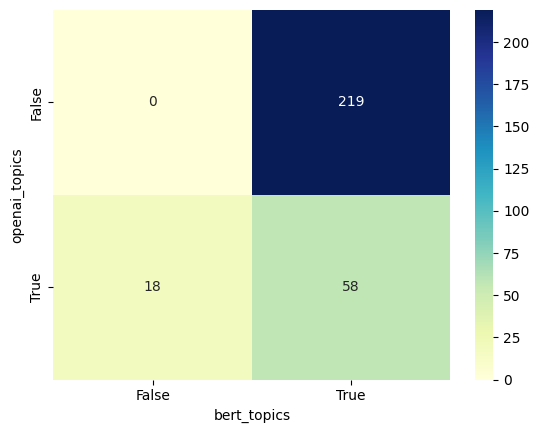

In [ ]:

# df where openai or bert topics are -1
a = df[(df['openai_topics'] == -1) | (df['bert_topics'] == -1)]

# confusion matrix of this 
#sns.heatmap(pd.crosstab(a['openai_topics'], a['bert_topics']), annot=True, cmap="YlGnBu", fmt='g')

# confusion matrix 2x2 if -1 or not 
sns.heatmap(pd.crosstab(a['openai_topics'] == -1, a['bert_topics'] == -1), annot=True, cmap="YlGnBu", fmt='g')


In [ ]:
# df where openai and bert topics are -1


# all the tweets that have two different values for openai and bert 
b = a[(a['openai_topics'] != a['bert_topics'])]


In [ ]:
b[b['openai_topics'] == -1]['text'].str.replace(r'#\S+', '', case=False).values

array(['BALAJI🇺🇸 I am never selling \xa0 for USD unless legally compelled to do so.☝️',
       'JUST IN: “I am never selling   for USD unless legally compelled to do so.” - @balajis 🙌 ',
       'That’s weak AF @balajis I AM NEVER SELLING MY  PERIOD ',
       'Good Morning    23 Day 3     ',
       "Dr4g0nL0rd found  in a User vault at this location! Join me playing  It's awesome!    ",
       "It is a Beautiful Morning.I'm beyond proud of you.    🌹 💎 ",
       'I love me some  snark in the morning. ',
       'Gym Jordan says something stupid… again.     ',
       'And the Weather Forecast 😂        ', ' done broke the Twitter ',
       'UN Speaks Up     ', "It's getting biblical.  ",
       '@BrendonLeslie @disclosetv  proof  is a ',
       '.@GovMurphy, your  is warning of increased damage  will bring to  @PaulASarlo, time for a hearing on S416. It’s  the  from the  industry. Why r we funding our destruction? @SpeakerCoughlin @SenPresScutari @asmjimkennedy ',
       'Putler speech at t

'BALAJI🇺🇸 I am never selling \xa0 for USD unless legally compelled to do so.☝️',
'JUST IN: “I am never selling   for USD unless legally compelled to do so.” - @balajis 🙌 ',
'That’s weak AF @balajis I AM NEVER SELLING MY  PERIOD ',
'Good Morning    23 Day 3     ',
"Dr4g0nL0rd found  in a User vault at this location! Join me playing  It's awesome!    ",
"It is a Beautiful Morning.I'm beyond proud of you.    🌹 💎 ",
'I love me some  snark in the morning. ',
'Gym Jordan says something stupid… again.     ',
'And the Weather Forecast 😂        ', ' done broke the Twitter ',
'UN Speaks Up     ', "It's getting biblical.  ",
'@BrendonLeslie @disclosetv  proof  is a ',
'.@GovMurphy, your  is warning of increased damage  will bring to  @PaulASarlo, time for a hearing on S416. It’s  the  from the  industry. Why r we funding our destruction? @SpeakerCoughlin @SenPresScutari @asmjimkennedy ',
'Putler speech at the icc hauge 2005.        ',
'Are you looking forward to creating a successful crowdfunding campaign page? ',
'Are you looking forward to designing an enticing crowdfunding campaign pitch for Kickstaer Gofundme Indiegogo? ',
'Only for Naija na him Content creators Use one person for Loyalty test then same person will be seen on another content creators video playing another role😒😒😒😒smh Guys the whole prank stuff is now a staged movie  '

In [ ]:
b[b['bert_topics'] == -1]['text'].value_counts()

Around the outside goes Zhou 🔥 #SaudiArabianGP #F1                                                                                                                                                                                                         4
Jeddah, but in pictures 📸 #SaudiArabianGP #F1 @redbullracing                                                                                                                                                                                               4
“That is a pass and a half!!!!” 😮#SaudiArabianGP #F1 @Charles_Leclerc                                                                                                                                                                                      4
More about this and many other topics in our #SaudiArabianGP Magazine at the link below ⬇️                                                                                                                                                       

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

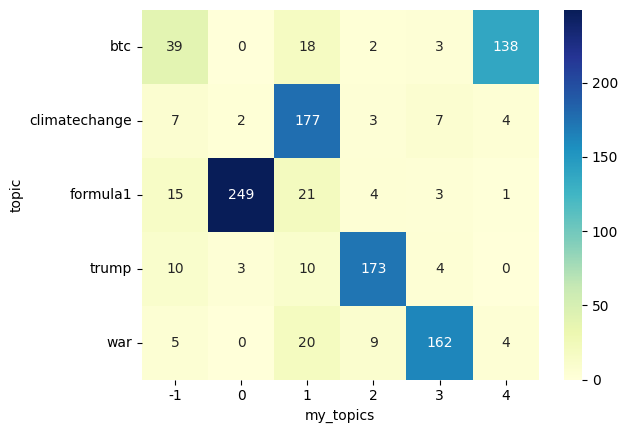

In [ ]:
openai_no_hash.visualize_heatmap()

In [ ]:
topics = bert_no_hash.df['topic'].unique()
results = {}
results_no_outliers = {}

# compute accuracy for each topic
for topic in topics:
    res = bert_no_hash.df[bert_no_hash.df['topic'] == topic].value_counts('my_topics') 
    # if the biggest label is -1, the second biggest is the right one
    first = res.iloc[0] if res.index[0] != -1 else res.iloc[1]                       # i'm assuming that out of the possible label the right one is the biggest 
    missed = sum(res.iloc[1:]) if res.index[0] != -1 else sum(res) - res.iloc[1]    # sum of the other labels
    outliers = res.loc[-1]

    
    print(topic, first, missed, outliers)
    results[topic] = first / (first + missed)
    results_no_outliers[topic] = first / (first + missed - outliers)  # bertopic mark the outliers with -1, i do not consider them while computing accuracy
        


btc 67 133 111
trump 172 28 19
climatechange 129 71 53
war 151 49 32
formula1 199 94 80


In [ ]:
results_no_outliers

{'btc': 0.7528089887640449,
 'trump': 0.9502762430939227,
 'climatechange': 0.8775510204081632,
 'war': 0.8988095238095238,
 'formula1': 0.9342723004694836}

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

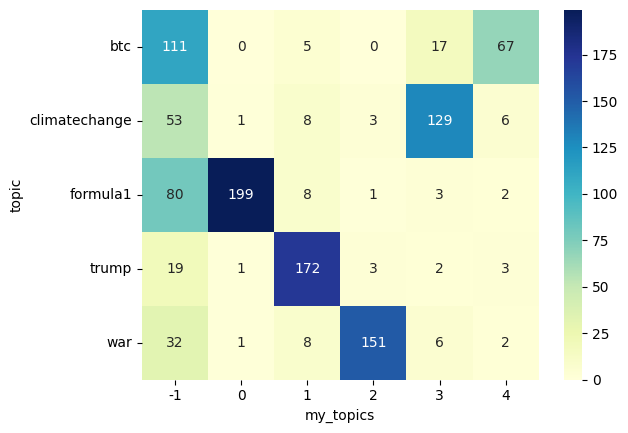

In [ ]:
bert_no_hash.visualize_heatmap()

# Politics supervised evaluation

In [ ]:
df = get_test_dataset('./../../data/politics_supervised/')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


In [ ]:
#gsdmm = Supervised(df, 'GSDMM')
#climatebert = Supervised(df, 'climatebert/distilroberta-base-climate-f')
#tweetclass = Supervised(df, 'louisbetsch/tweetclassification-bf-model')
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')
#use = Supervised(df, 'USE')

evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


In [206]:
openai_res = pd.DataFrame(df['topic'])
for i in range(10):
    openai_eval = Supervised(df, 'openai')
    openai_res['my_topics_' + str(i)] = openai_eval.df['my_topics']


evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaning

In [205]:
# heatmap of mytopic1 vs mytopic2
openai_res

,topic,my_topics_0,my_topics_1,my_topics_2
1640380557442818056,kabul,2,2,2
1640380163379671040,kabul,2,2,2
1640378515748003841,kabul,2,2,2
1640376804987813892,kabul,2,2,2
1640374299063205888,kabul,2,2,2
...,...,...,...,...
1638031875502473217,trump_stormy,0,0,0
1638031119823294466,trump_stormy,0,0,0
1638027516416872449,trump_stormy,0,0,0
1638027312410112002,trump_stormy,0,0,0


In [180]:
openai_eval.df['my_topics']

1640380557442818056    2
1640380163379671040    2
1640378515748003841    2
1640376804987813892    2
1640374299063205888    2
                      ..
1638031875502473217    0
1638031119823294466    0
1638027516416872449    0
1638027312410112002    0
1638025196195151873    0
Name: my_topics, Length: 1492, dtype: int64

In [175]:
bert.model.generate_topic_labels()

['-1_standwithukraine_civilrights_russiaiscollapsing',
 '0_bidenharris2024_biden_potus',
 '1_stormydaniels_trump_trumpindictment',
 '2_kabul_afghanistan_ministry',
 '3_belarus_russia_putin',
 '4_kamalaharris_ghana_africa',
 '5_indictarrestandconvicttrump_law_criminal',
 '6_cables_yuanyuanguzheng_taiwan',
 '7_drone_invaders_grenades']

## Results

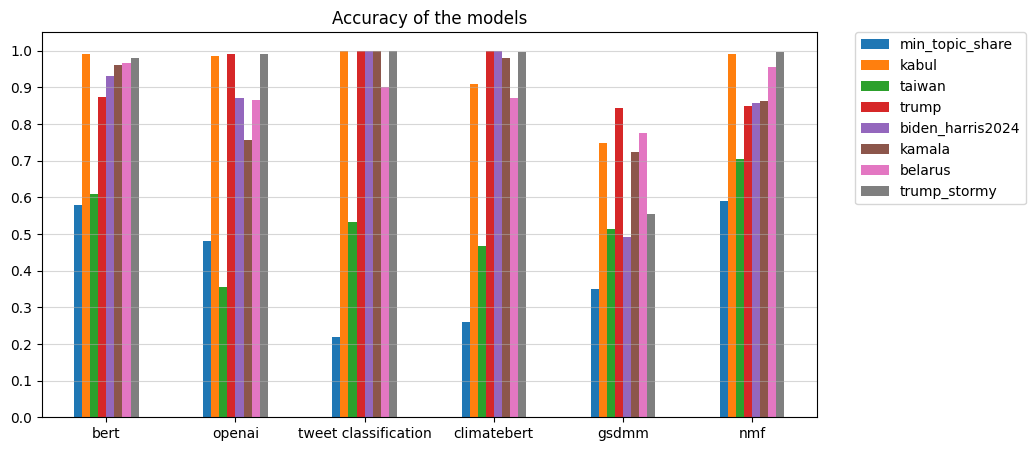

In [120]:
models = {'bert': bert.accuracy, 'openai': openai_eval.accuracy, 'tweet classification': tweetclass.accuracy, 'climatebert': climatebert.accuracy, 'gsdmm': gsdmm.accuracy, 'nmf': nmf.accuracy }
compare_models(models)

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

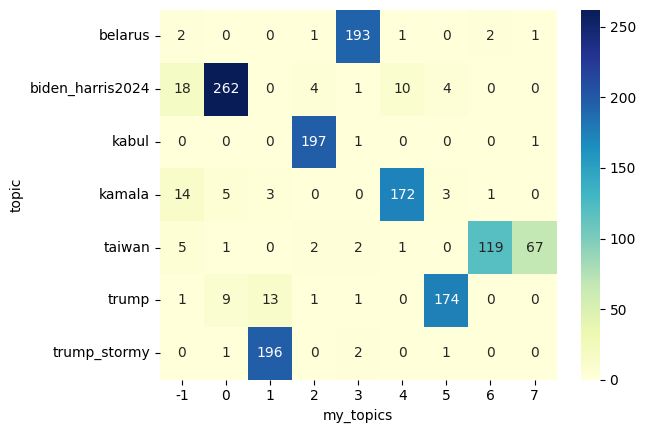

In [178]:
bert.visualize_heatmap()

In [177]:
bert.visualize_documents()

In [132]:
nmf_no_hash = Supervised(df_no_hash, 'NMF')
bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')

evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


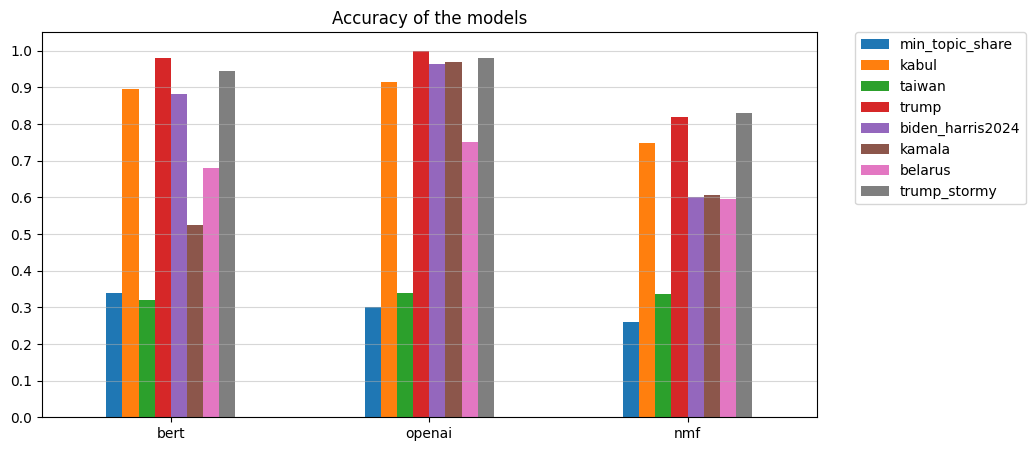

In [133]:
models = {'bert': bert_no_hash.accuracy, 'openai': openai_no_hash.accuracy, 'nmf': nmf_no_hash.accuracy }
compare_models(models)

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

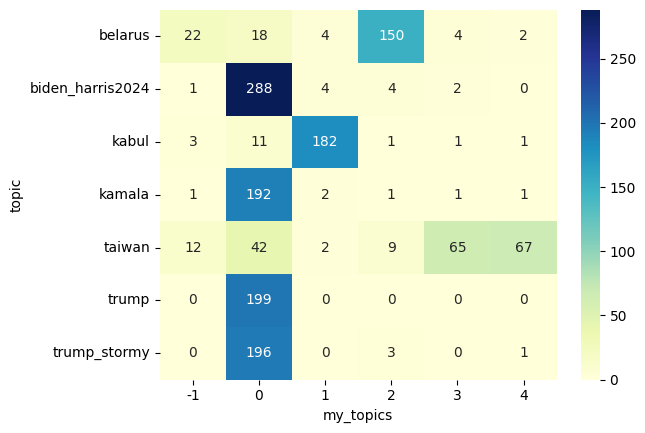

In [138]:
openai_no_hash.visualize_heatmap()

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

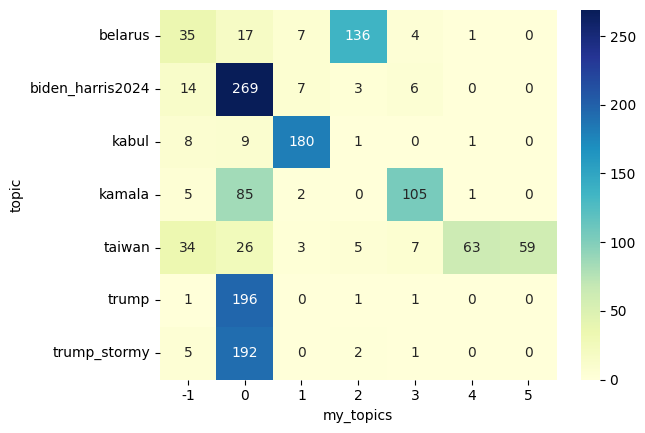

In [100]:
bert.visualize_heatmap()

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

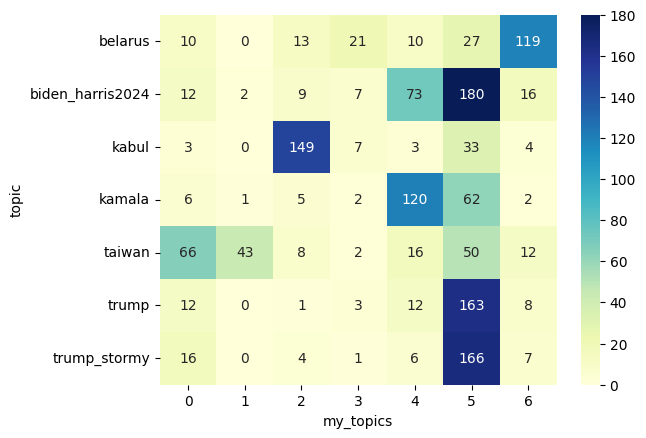

In [139]:
# nmf 
nmf_no_hash.visualize_heatmap()

In [144]:
df

,text,lang,topic
1640380557442818056,🔴 #Heabreaking💔 Same poor Afghan kid after tod...,en,kabul
1640380163379671040,"6 Killed, Several Injured In Suicide Attack In...",en,kabul
1640378515748003841,@Spencers_place @RickyDoggin Are you asking ab...,en,kabul
1640376804987813892,"⚡️ Two Killed, Dozen Injured in #Kabul Bomb Bl...",en,kabul
1640374299063205888,A suicide bomber below himself as he was ident...,en,kabul
...,...,...,...
1638031875502473217,Genius #HushMoneyKeeping himself in the #spotl...,en,trump_stormy
1638031119823294466,If a #Democrat #tedkenndy gets away with not r...,en,trump_stormy
1638027516416872449,@1JaySC Hell yea Lock his diy self up. yes wh...,en,trump_stormy
1638027312410112002,Trump had his &amp; Rudy Giuliani's former law...,en,trump_stormy


In [145]:
df = get_test_dataset('/Users/alessiogandelli/dev/internship/BERTopic_evaluation/data/US_supervised')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


In [146]:
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')

evaluate NMF
evaluate all-MiniLM-L6-v2
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


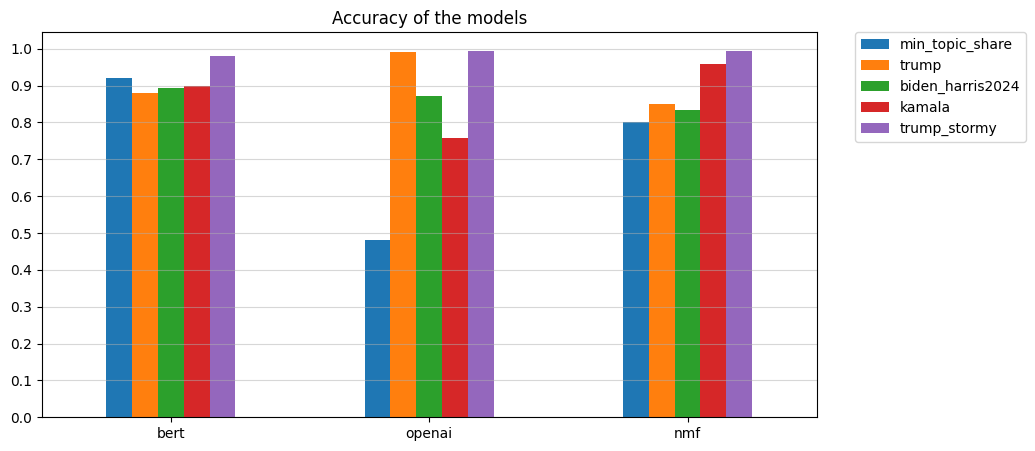

In [147]:
models = {'bert': bert.accuracy, 'openai': openai_eval.accuracy, 'nmf': nmf.accuracy }
compare_models(models)

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

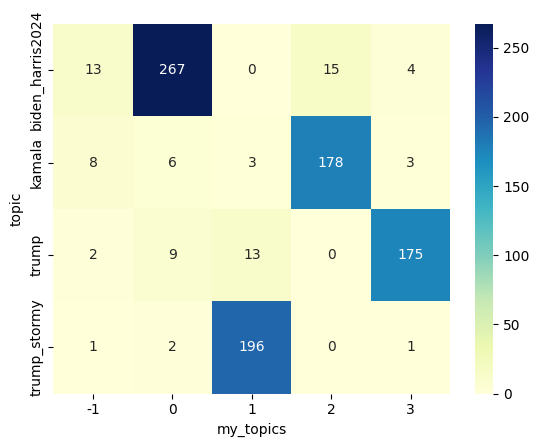

In [165]:
bert.visualize_heatmap()

In [156]:
nmf_no_hash = Supervised(df_no_hash, 'NMF')
bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')

evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


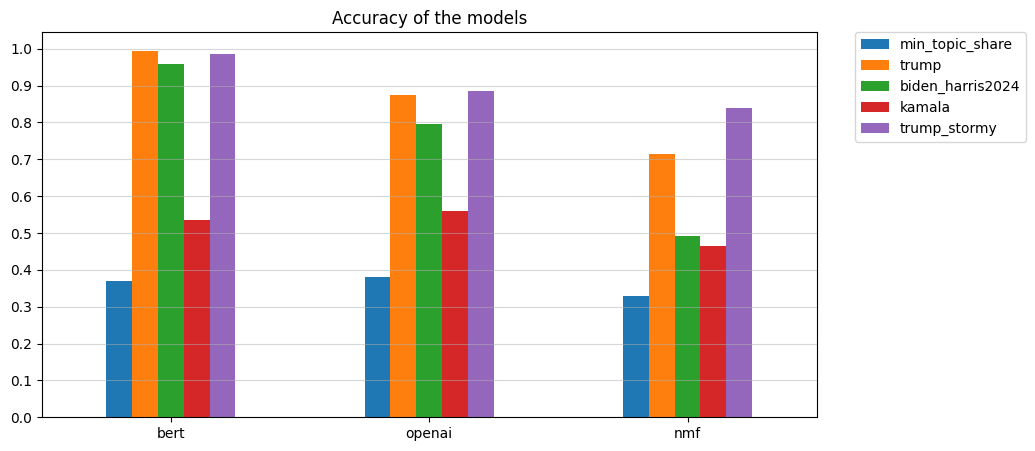

In [166]:
models = {'bert': bert_no_hash.accuracy, 'openai': openai_no_hash.accuracy, 'nmf': nmf_no_hash.accuracy }
compare_models(models)

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

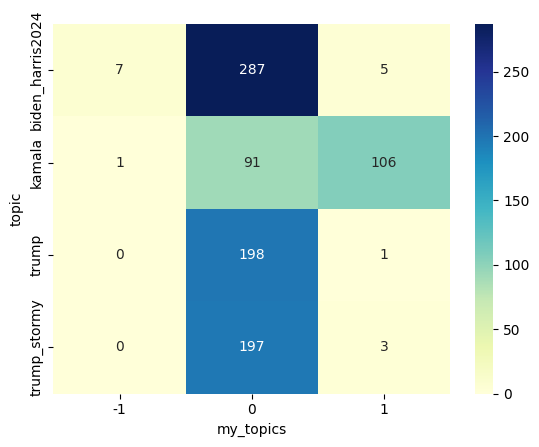

In [171]:
bert_no_hash.visualize_heatmap()

In [172]:
bert_no_hash.visualize_documents()